In [ ]:
# ARIMA (Reliable for prediciton short term share market movement )

In [ ]:
# %pip uninstall statsmodels 
# %pip install yfinance
# %pip install statsmodels --upgrade

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

### Historical closing price data for Google ( time series model training and Comparison)

[*********************100%***********************]  1 of 1 completed


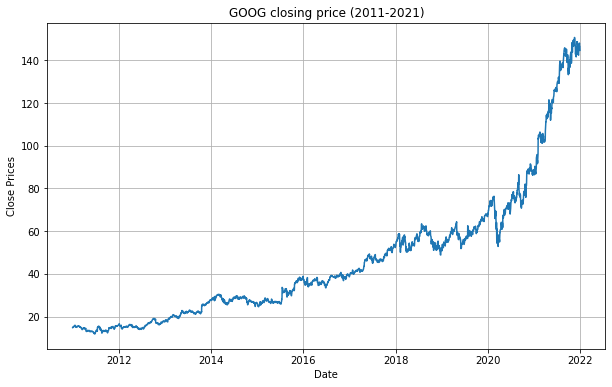

In [38]:
his_data = yf.download("GOOG", start="2011-01-01", end="2022-1-1")
ten_yr_closing=his_data['Close']

# Visualisation
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(ten_yr_closing)
plt.title('GOOG closing price (2011-2021)')
plt.show()

#### Check stationary with ADF test

In [3]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result =adfuller(ten_yr_closing)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 3.3527226334330935
p-value: 1.0


In [6]:
# P-value is higher than 0.05, cannot reject the Null hypothesis, 
# it is non-stationary

### Option 1: Manually figure out the order of ARIMA

#### ACF( Autocorrelation Function) 

In [ ]:
#plot to check the No. of terms required to 
# Remove any autocorrelation in the series

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

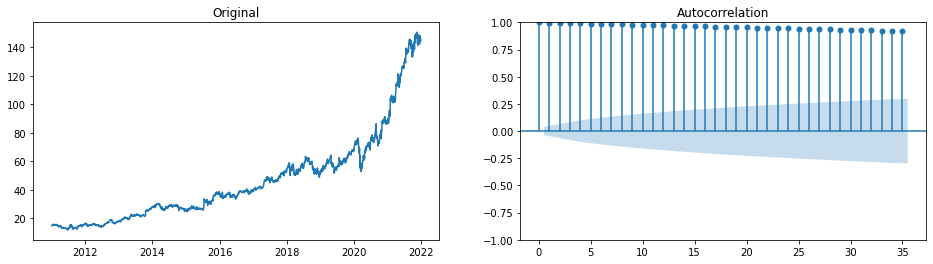

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(ten_yr_closing)
ax1.set_title('Original')

plot_acf(ten_yr_closing,ax=ax2);

#### Finding d :The number of differencing required to make the time series stationary

##### Graphically:

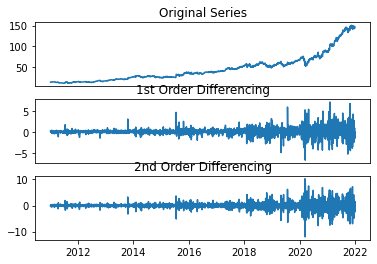

In [43]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(ten_yr_closing); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(ten_yr_closing.diff().dropna()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(ten_yr_closing.diff().diff().dropna()); ax3.set_title('2nd Order Differencing')
plt.show()

In [ ]:
## Difference it ONCE is enough to successfully remove autocorrelation

##### Automatically: pmdarima for getting the number of differencing automatically 

In [44]:
from pmdarima.arima.utils import ndiffs

In [45]:
ndiffs(ten_yr_closing,test='adf')

1

In [ ]:
# No. of differencing required to make the series stationary is 1

#### Finding p: The order of the Autoregressive term (# of lags to be used)

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf

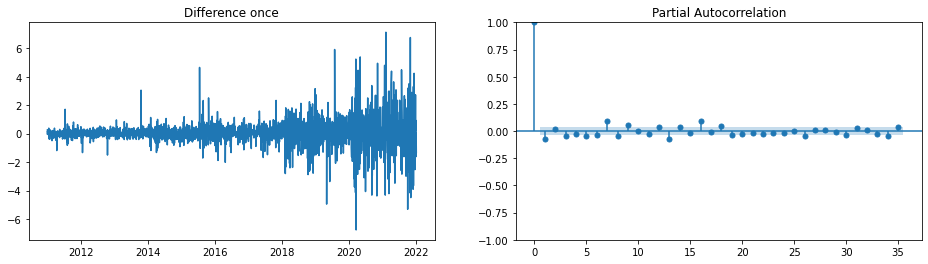

In [47]:
diff=ten_yr_closing.diff().dropna() # Found differencing ONCE is enough

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)

plot_pacf(diff,ax=ax2,method='ywm');

In [ ]:
# Lag = 1 seems exceed the significant line

##### Finding q: The order of the MA term (# of lags FC error to be used)

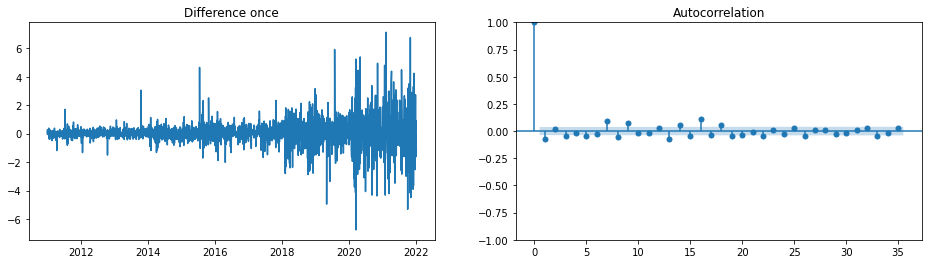

In [48]:
diff=ten_yr_closing.diff().dropna() # Found differencing ONCE is enough

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)

plot_acf(diff,ax=ax2);

In [ ]:
# q can be 1 which stands out from the significant region

### Option 2: Using Auto ARIMA to figure out the order

In [49]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [50]:
stepwise_fit=auto_arima(ten_yr_closing,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.78 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9316.768, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8337.734, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=8054.451, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=7871.135, Time=0.13 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=7778.233, Time=0.14 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=7699.668, Time=0.21 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7701.666, Time=0.38 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 4.542 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2770
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -3843.834
Date:                Mon, 26 Sep 2022   AIC                           7699.668
Time:                        13:22:22   BIC                           7735.223
Sample:                             0   HQIC                          7712.510
                               - 2770                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8749      0.010    -84.490      0.000      -0.895      -0.855
ar.L2         -0.6545      0.014    -45.823      0.000      -0.683      -0.627
ar.L3         -0.5001      0.015    -33.507      0.000      -0.529      -0.471
ar.L4         -0.3266      0.013    -25.820      0.000      -0.351      -0.302
ar.L5         -0.1694      0.010    -17.204      0.000      -0.189      -0.150
sigma2         0.9409      0.010     90.759      0.000       0.921       0.961
===================================================================================
Ljung-Box (L1) (Q):                   4.91   Jarque-Bera (JB):             12109.47
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):              23.76   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
## Noted that it used the whole non-stationary data to fit the AUTO_ARIMA model 
## becasue the default for stationary in the function is FALSE

## Result: SARIMAX but there is no seasoonality given by the (0,0,0) in ARIMA(5,2,0)(0,0,0)[0]
## It is just ARIMA (5,2,0)

### Train Test Split

In [51]:
print (f"# of rows in Original: {len(ten_yr_closing)}")
n=int(len(ten_yr_closing)*0.8)
       
train=ten_yr_closing[:n]
print (f"# of rows in Train: {len(train)}")
       
test=ten_yr_closing[n:]
print (f"# of rows in Test: {len(test)}")

# of rows in Original: 2770
# of rows in Train: 2216
# of rows in Test: 554


### Model Training ( Manually found ARIMA(1,1,1) vs Algorithimic found ARIMA (5,2,0))

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
# ARIMA (1,1,1)
model_111=ARIMA(train,order=(1,1,1)) # As suggested by AUTO_ARIMA (5,2,0)
model_111=model_111.fit()
model_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2216
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1844.100
Date:                Mon, 26 Sep 2022   AIC                           3694.199
Time:                        14:14:34   BIC                           3711.308
Sample:                             0   HQIC                          3700.449
                               - 2216                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7768      0.112     -6.917      0.000      -0.997      -0.557
ma.L1          0.8089      0.106      7.665      0.000       0.602       1.016
sigma2         0.3095      0.003     97.696      0.000       0.303       0.316
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):             21642.53
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               8.96   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
# ARIMA (5,2,0)
model_520=ARIMA(train,order=(5,2,0)) # As suggested by AUTO_ARIMA (5,2,0)
model_520=model_520.fit()
model_520.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2216
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -2046.447
Date:                Mon, 26 Sep 2022   AIC                           4104.895
Time:                        14:12:28   BIC                           4139.110
Sample:                             0   HQIC                          4117.393
                               - 2216                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7897      0.013    -58.742      0.000      -0.816      -0.763
ar.L2         -0.6692      0.018    -37.416      0.000      -0.704      -0.634
ar.L3         -0.4647      0.019    -24.655      0.000      -0.502      -0.428
ar.L4         -0.2856      0.017    -16.779      0.000      -0.319      -0.252
ar.L5         -0.1606      0.013    -12.545      0.000      -0.186      -0.136
sigma2         0.3717      0.004     85.182      0.000       0.363       0.380
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):             13387.33
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               9.40   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model testing ( Manually found ARIMA(1,1,1) vs Algorithimic found ARIMA (5,2,0))

In [98]:
# ARIMA (1,1,1)
start=len(train)
end=len(train)+len(test)-1
pred_111=model_111.predict(start=start,end=end,dynamic=True)
pred_111.index=ten_yr_closing.index[start:end+1]
print(pred_111)

Date
2019-10-22    62.354720
2019-10-23    62.318037
2019-10-24    62.346534
2019-10-25    62.324396
2019-10-28    62.341594
                ...    
2021-12-27    62.334075
2021-12-28    62.334075
2021-12-29    62.334075
2021-12-30    62.334075
2021-12-31    62.334075
Name: predicted_mean, Length: 554, dtype: float64


In [99]:
# ARIMA (5,2,0)
start=len(train)
end=len(train)+len(test)-1
pred_520=model_520.predict(start=start,end=end,dynamic=True)
pred_520.index=ten_yr_closing.index[start:end+1]
print(pred_520)

Date
2019-10-22     62.545985
2019-10-23     62.818795
2019-10-24     62.907710
2019-10-25     63.042348
2019-10-28     63.123136
                 ...    
2021-12-27    135.407289
2021-12-28    135.539877
2021-12-29    135.672465
2021-12-30    135.805053
2021-12-31    135.937641
Name: predicted_mean, Length: 554, dtype: float64


### Validating performance

#### Graphically

<AxesSubplot:xlabel='Date'>

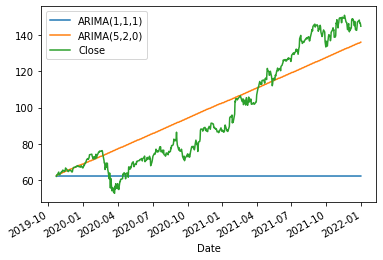

In [109]:
# Visualisation
pred_111.plot(label="ARIMA(1,1,1)").legend()
pred_520.plot(label="ARIMA(5,2,0)").legend()
test.plot(legend=True)

In [110]:
# Grapgically, ARIMA(5,2,0) performs better

#### With Testing Metrics

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_111=sqrt(mean_squared_error(pred_111,test))
rmse_520=sqrt(mean_squared_error(pred_520,test))
print(f"Mean of testing set: {test.mean()}")
print(f"RMSE of ARIMA(1,1,1): {rmse_111}")
print(f"RMSE of ARIMA(5,2,0): {rmse_520}")

Mean of testing set: 96.73426851210611
RMSE of ARIMA(1,1,1): 45.484128265103195
RMSE of ARIMA(5,2,0): 11.884212402706366


In [111]:
# Statistically, ARIMA (5,2,0) performs better

### Making Forecast for the next 31 days with ARIMA(5,2,0)

In [88]:
#Retrain model with all data
model_all=ARIMA(ten_yr_closing,order=(5,2,0))
model_all=model_all.fit()

In [90]:
# Forecast
index_future=pd.date_range(start='2022-01-01',end='2022-01-31')
pred=model_all.predict(start=len(ten_yr_closing),end=len(ten_yr_closing)+30,type='levels')
pred.index=index_future
print(pred)

2022-01-01    144.309246
2022-01-02    143.805775
2022-01-03    143.104921
2022-01-04    142.550180
2022-01-05    141.891364
2022-01-06    141.208800
2022-01-07    140.629083
2022-01-08    140.012698
2022-01-09    139.382190
2022-01-10    138.761987
2022-01-11    138.130788
2022-01-12    137.504080
2022-01-13    136.886310
2022-01-14    136.262307
2022-01-15    135.637506
2022-01-16    135.013409
2022-01-17    134.388657
2022-01-18    133.764937
2022-01-19    133.141707
2022-01-20    132.517606
2022-01-21    131.893525
2022-01-22    131.269526
2022-01-23    130.645542
2022-01-24    130.021683
2022-01-25    129.397805
2022-01-26    128.773824
2022-01-27    128.149864
2022-01-28    127.525919
2022-01-29    126.901984
2022-01-30    126.278057
2022-01-31    125.654119
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot:title={'center':'Prediction for the next 31 days'}, xlabel='Date'>

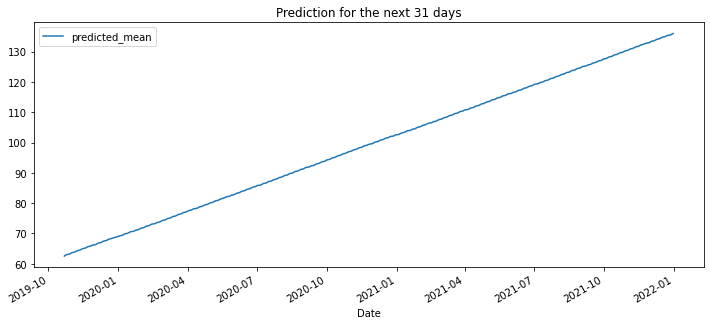

In [112]:
# Visualise
pred.plot(figsize=(12,5),legend=True,title='Prediction for the next 31 days')